# Exploratory Data Analysis (EDA)

From 1. revenue-vs-vehicle_count EDA, we can confirms that vehicle registration volume is a key operational metric that closely aligns with quarterly revenue performance for all companies studied, especially Tan Chong Motor and DRB-HICOM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load data
all_vehicles_reg_monthly = pd.read_csv('../data/company_vehicle_data/monthly/all_companies_vehicle_reg_monthly.csv')
macro_data_merged = pd.read_csv('../data/macro_data_merged.csv')

# Ensure both columns are datetime
all_vehicles_reg_monthly['month'] = pd.to_datetime(all_vehicles_reg_monthly['month'])
macro_data_merged['date'] = pd.to_datetime(macro_data_merged['date'])

# Merge datasets on date/month
df = pd.merge(
    all_vehicles_reg_monthly,
    macro_data_merged,
    left_on='month',
    right_on='date',
    how='left'  # or 'inner' if you want to exclude unmatched months
)

# Drop duplicate 'date' column if necessary
df.drop(columns=['month'], inplace=True)

# Preview result
df.head()

,company,vehicle_count,date,subclass,cars_cpi,subclass name,opr,lf,lf_employed,lf_unemployed,lf_outside,p_rate,ep_ratio,u_rate
0,Bermaz Auto Berhad,1411,2018-01-01,7111,98.5,Cars,3.00,15187.0,14670.5,516.5,7074.8,68.2,65.9,3.4
1,Bermaz Auto Berhad,1065,2018-02-01,7111,98.5,Cars,3.25,15230.0,14721.5,508.5,7112.3,68.2,65.9,3.3
2,Bermaz Auto Berhad,1176,2018-03-01,7111,98.5,Cars,3.25,15241.2,14732.5,508.7,7115.0,68.2,65.9,3.3
3,Bermaz Auto Berhad,1034,2018-04-01,7111,98.5,Cars,3.25,15313.1,14803.1,510.0,7130.9,68.2,66.0,3.3
4,Bermaz Auto Berhad,515,2018-05-01,7111,98.5,Cars,3.25,15357.5,14852.6,504.8,7097.1,68.4,66.1,3.3


## 📊 Dataset Description: Monthly Vehicle Registration with Macroeconomic Indicators

This dataset combines monthly vehicle registration data by automotive company with macroeconomic indicators from 2018 to 2025.

### 🔢 Columns

| Column Name         | Data Type | Description |
|---------------------|-----------|-------------|
| `company`           | String    | Name of the automotive company responsible for the vehicle registration. |
| `vehicle_count`     | Integer   | Total number of vehicles registered under the specified company for the given month. |
| `date`              | Date      | The date of the observation in YYYY-MM-DD format (DD is always `01`, representing monthly frequency). |
| `subclass`          | String    | COICOP subclass code; here, `07111` refers specifically to private vehicles (Cars). |
| `cars_cpi`          | Float     | Consumer Price Index for cars, measuring changes in car prices relative to the base year. |
| `subclass name`     | String    | Description of the COICOP subclass, e.g., `Cars`. |
| `opr`               | Float     | **Overnight Policy Rate (OPR)** set by Bank Negara Malaysia, influencing lending and borrowing rates. |
| `lf`                | Float     | **Labour Force Size** (in thousands). Total number of employed and unemployed individuals actively participating in the labour force. |
| `lf_employed`       | Float     | **Employed Persons** (in thousands). Number of individuals who worked at least one hour for pay, profit, or family gain. |
| `lf_unemployed`     | Float     | **Unemployed Persons** (in thousands). Number of individuals who are jobless but actively seeking employment. |
| `lf_outside`        | Float     | **Persons Outside the Labour Force** (in thousands). Includes housewives, students, retirees, and others not seeking employment. |
| `p_rate`            | Float     | **Participation Rate** (%). Proportion of the working-age population (15–64 years old) participating in the labour force. |
| `ep_ratio`          | Float     | **Employment-Population Ratio** (%). Proportion of the working-age population that is employed. |
| `u_rate`            | Float     | **Unemployment Rate** (%). Proportion of the labour force that is unemployed. |


In [10]:
df['opr_ema6'] = df['opr'].ewm(span=6, adjust=True).mean()
df['cars_cpi_ema6'] = df['cars_cpi'].ewm(span=6, adjust=True).mean()

In [3]:
import pandas as pd

# Assuming `df` is your full DataFrame containing multiple companies
companies = df['company'].unique()

# Store correlations for each company
correlation_results = {}

for company in companies:
    company_df = df[df['company'] == company]

    # Drop non-numeric columns
    corr_df = company_df.drop(columns=['company', 'date', 'subclass name', 'subclass'], errors='ignore')

    # Compute correlation matrix
    correlation_matrix = corr_df.corr(numeric_only=True)

    # Extract correlation of vehicle_count with other features
    vehicle_count_corr = correlation_matrix['vehicle_count'].drop('vehicle_count')

    # Store sorted correlation for the company
    correlation_results[company] = vehicle_count_corr.sort_values(ascending=False)

# Display results
for company, corr_series in correlation_results.items():
    print(f"\n--- {company} ---")
    print(corr_series)



--- Bermaz Auto Berhad ---
p_rate           0.434347
ep_ratio         0.422269
lf_employed      0.391886
lf               0.368532
opr              0.105279
cars_cpi        -0.020993
lf_unemployed   -0.188467
lf_outside      -0.190398
u_rate          -0.268756
Name: vehicle_count, dtype: float64

--- DRB-HICOM Berhad ---
p_rate           0.501240
ep_ratio         0.480468
lf_employed      0.469085
lf               0.447302
opr              0.038043
cars_cpi        -0.090654
lf_outside      -0.178518
lf_unemployed   -0.183683
u_rate          -0.277508
Name: vehicle_count, dtype: float64

--- Sime Darby Berhad ---
p_rate           0.788878
ep_ratio         0.782359
lf_employed      0.738437
lf               0.692844
opr              0.336445
cars_cpi         0.151647
lf_outside      -0.331817
lf_unemployed   -0.366020
u_rate          -0.500700
Name: vehicle_count, dtype: float64

--- Sime UMW Holdings Berhad ---
p_rate           0.700845
ep_ratio         0.688937
lf_employed      0.6656

C:\Users\gooyt\AppData\Local\Temp\ipykernel_17440\565140965.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gooyt\AppData\Local\Temp\ipykernel_17440\565140965.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gooyt\AppData\Local\Temp\ipykernel_17440\565140965.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gooyt\AppData\Local\Temp\ipykernel_17440\565140965.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` 

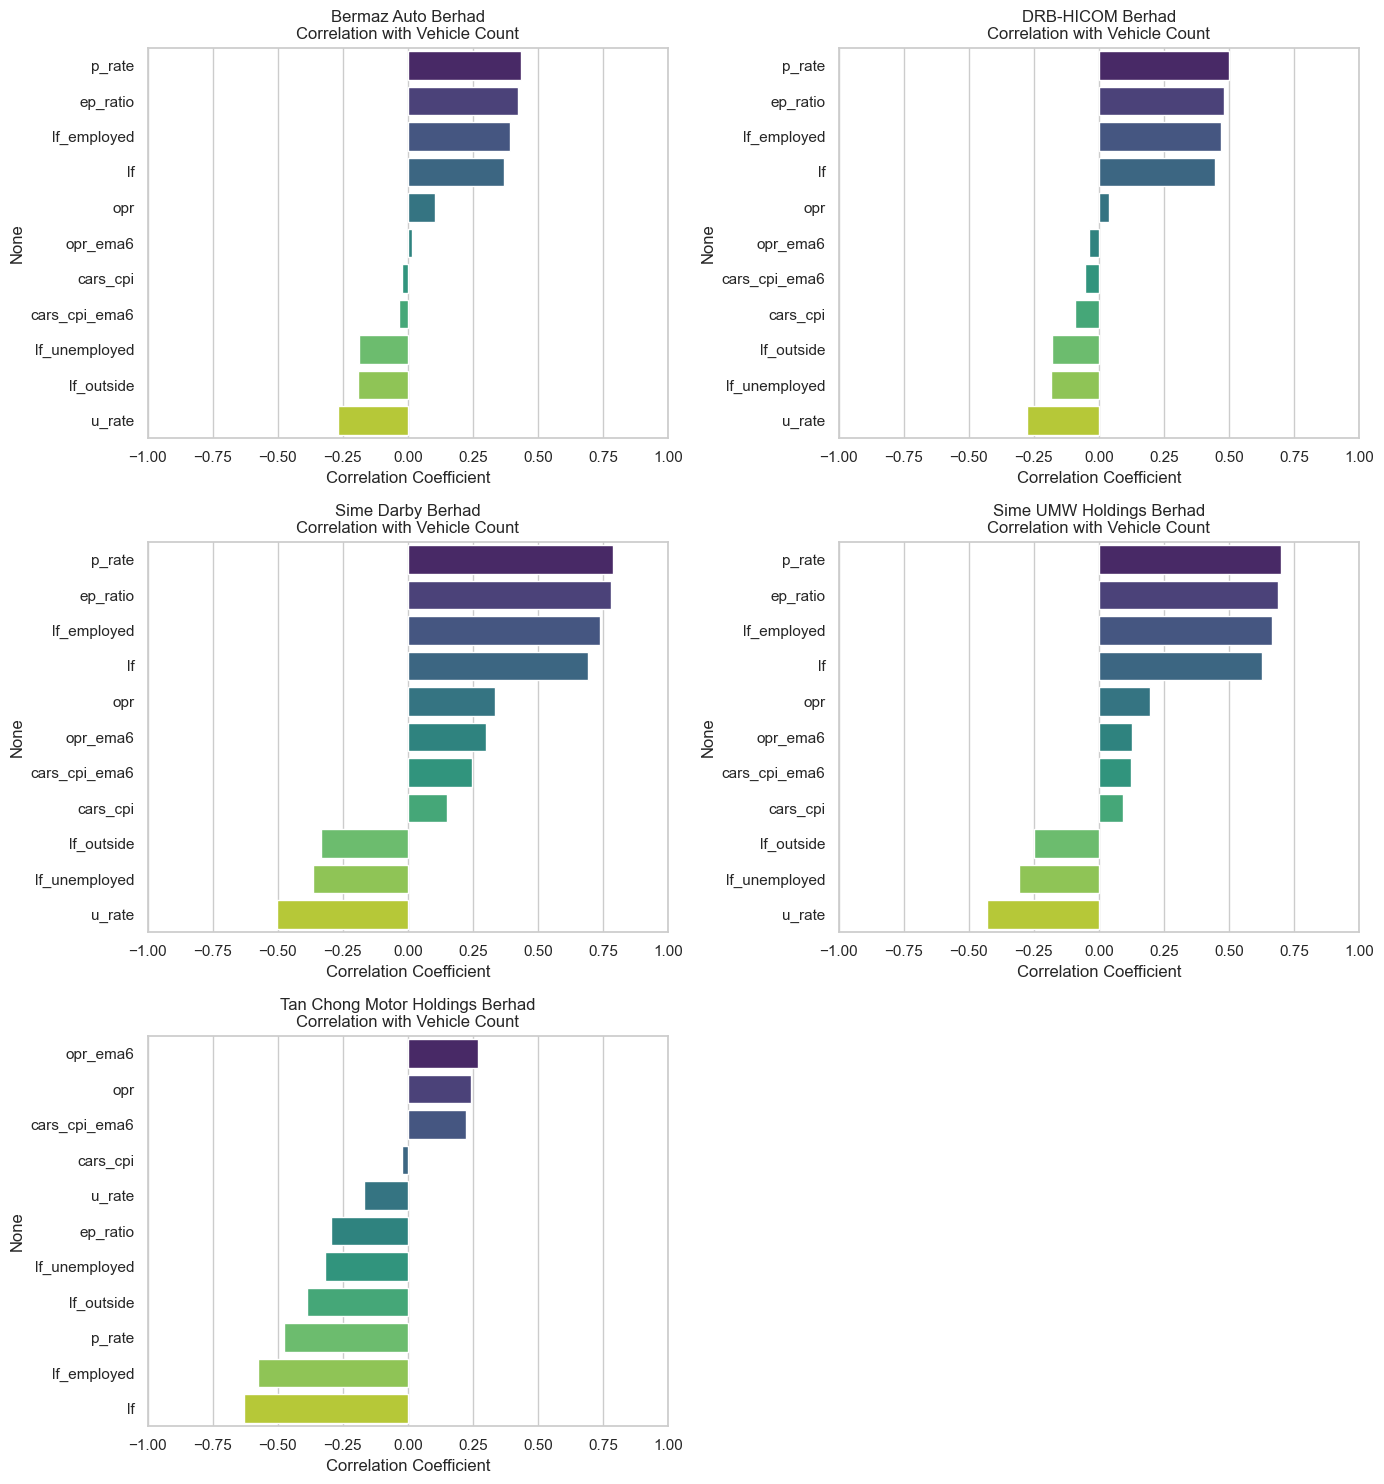

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Define number of companies for layout
num_companies = len(correlation_results)
cols = 2  # Number of columns in subplot
rows = (num_companies + 1) // cols  # Number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

# Plot each company’s correlation
for i, (company, corr_series) in enumerate(correlation_results.items()):
    sns.barplot(
        x=corr_series.values,
        y=corr_series.index,
        ax=axes[i],
        palette="viridis"
    )
    axes[i].set_title(f"{company}\nCorrelation with Vehicle Count")
    axes[i].set_xlabel("Correlation Coefficient")
    axes[i].set_xlim(-1, 1)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


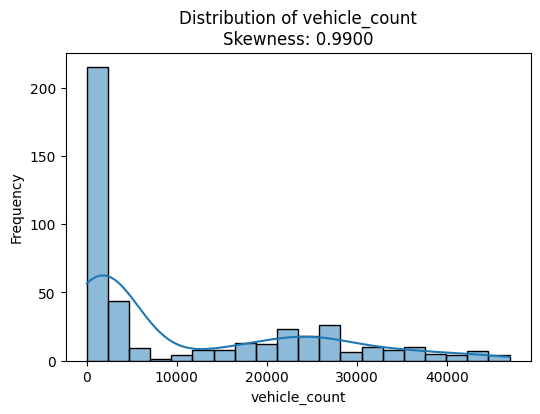

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df['vehicle_count'], kde=True, bins=20)
plt.title(f"Distribution of vehicle_count\nSkewness: {df['vehicle_count'].skew():.4f}")
plt.xlabel('vehicle_count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['vehicle_count_log'] = np.log1p(df['vehicle_count'])
# df['month'] = df['date'].dt.month
# df['year'] = df['date'].dt.year

In [31]:
# One-Hot Encode the 'company' column in df
df_encoded = pd.get_dummies(df, columns=['company'], prefix='company')

# Preview the encoded dataframe
df_encoded.head()

,vehicle_count,date,subclass,cars_cpi,subclass name,opr,lf,lf_employed,lf_unemployed,lf_outside,...,ep_ratio,u_rate,vehicle_count_log,month,year,company_Bermaz Auto Berhad,company_DRB-HICOM Berhad,company_Sime Darby Berhad,company_Sime UMW Holdings Berhad,company_Tan Chong Motor Holdings Berhad
0,1411,2018-01-01,7111,98.5,Cars,3.00,15187.0,14670.5,516.5,7074.8,...,65.9,3.4,7.252762,1,2018,True,False,False,False,False
1,1065,2018-02-01,7111,98.5,Cars,3.25,15230.0,14721.5,508.5,7112.3,...,65.9,3.3,6.971669,2,2018,True,False,False,False,False
2,1176,2018-03-01,7111,98.5,Cars,3.25,15241.2,14732.5,508.7,7115.0,...,65.9,3.3,7.070724,3,2018,True,False,False,False,False
3,1034,2018-04-01,7111,98.5,Cars,3.25,15313.1,14803.1,510.0,7130.9,...,66.0,3.3,6.942157,4,2018,True,False,False,False,False
4,515,2018-05-01,7111,98.5,Cars,3.25,15357.5,14852.6,504.8,7097.1,...,66.1,3.3,6.246107,5,2018,True,False,False,False,False


## 1. Forecasting Monthly Vehicle Registrations (by company) using SARIMAX - BERMAZ AUTO BERHAD


In [4]:
import pandas as pd

# Filter company and date
df_bermaz = df[(df['company'] == 'Bermaz Auto Berhad') & (df['date'] < '2024-10-01')].copy()

# Set the date as index
df_bermaz.set_index('date', inplace=True)

# Sort by date just in case
df_bermaz.sort_index(inplace=True)


In [196]:
# Target variable (endogenous)
y = df_bermaz['vehicle_count']

# Exogenous variables
exog_vars = [
    'cars_cpi', 'u_rate'
]

# exog_vars = [
#     'cars_cpi_ema6', 'opr_ema6','lf_employed', 'p_rate',
#     'ep_ratio', 'u_rate'
# ]
X = df_bermaz[exog_vars]


In [200]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMAX model (simple config, can be optimized later)
model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       vehicle_count   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -317.090
Date:                             Mon, 02 Jun 2025   AIC                            648.179
Time:                                     19:25:55   BIC                            660.508
Sample:                                 01-01-2018   HQIC                           652.726
                                      - 09-01-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cars_cpi    -501.9572    110.819     -4.530      0.000    -719.158    -284.757
u_rate      -907.4878    268.868     -3.375      0.001   -1434.460    -380.515
ar.L1          0.1331      0.496      0.268      0.789      -0.840       1.106
ma.L1         -0.3724      0.443     -0.841      0.400      -1.240       0.496
ar.S.L12      -0.4860      0.130     -3.751      0.000      -0.740      -0.232
ar.S.L24      -0.6206      0.147     -4.233      0.000      -0.908      -0.333
sigma2      1.414e+05   2.41e+04      5.871      0.000    9.42e+04    1.89e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.94
Prob(Q):                              0.92   Prob(JB):                         0.02
Heteroskedasticity (H):               0.83   Skew:                             0.84
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [198]:
# Filter the next 6 months (for validation and exog forecast)
df_val = df[(df['company'] == 'Bermaz Auto Berhad') & 
            (df['date'] >= '2024-10-01') & 
            (df['date'] <= '2025-03-01')].copy()

# Make sure dates are sorted and indexed properly
df_val.set_index('date', inplace=True)
df_val.sort_index(inplace=True)

# Exogenous variables for prediction
X_future = df_val[exog_vars]

# Forecast 6 months using future exogenous variables
forecast_6mo = model_fit.forecast(steps=6, exog=X_future)

# Show results
print(forecast_6mo)


2024-10-01    1421.408070
2024-11-01    1876.486036
2024-12-01    1859.858675
2025-01-01     989.242699
2025-02-01     480.915155
2025-03-01    1427.083641
Freq: MS, Name: predicted_mean, dtype: float64


             Forecasted  Actual
2024-10-01  1421.408070    1324
2024-11-01  1876.486036    1130
2024-12-01  1859.858675    1524
2025-01-01   989.242699     943
2025-02-01   480.915155     863
2025-03-01  1427.083641    1167


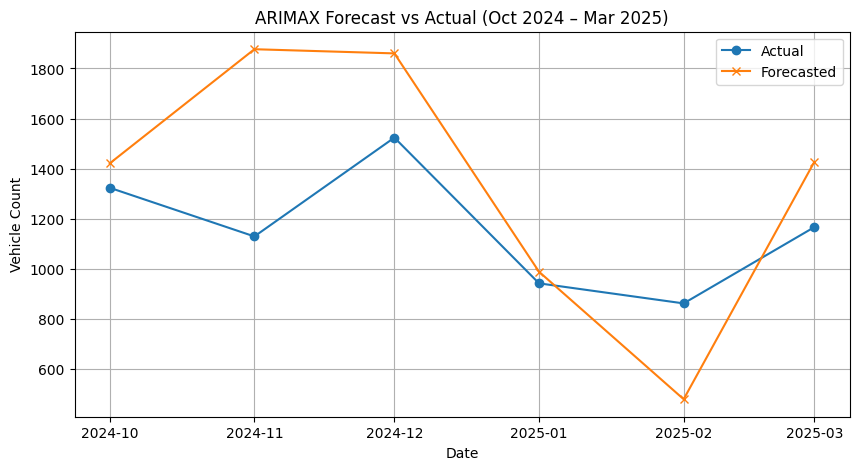

In [199]:
# Actual values from validation set
y_actual = df_val['vehicle_count']

# Combine into a DataFrame
results = pd.DataFrame({
    'Forecasted': forecast_6mo,
    'Actual': y_actual
})
print(results)

plt.figure(figsize=(10, 5))
plt.plot(results.index, results['Actual'], label='Actual', marker='o')
plt.plot(results.index, results['Forecasted'], label='Forecasted', marker='x')
plt.title('ARIMAX Forecast vs Actual (Oct 2024 – Mar 2025)')
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.show()


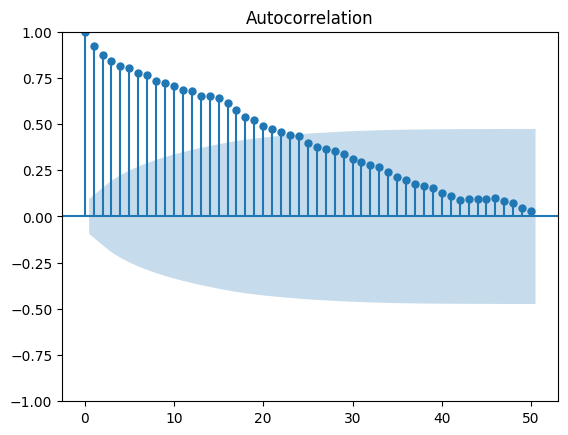

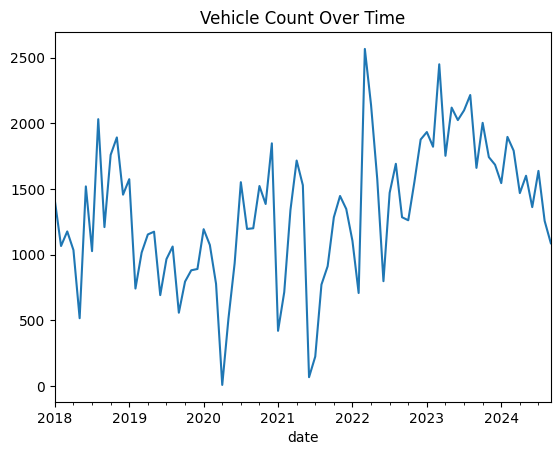

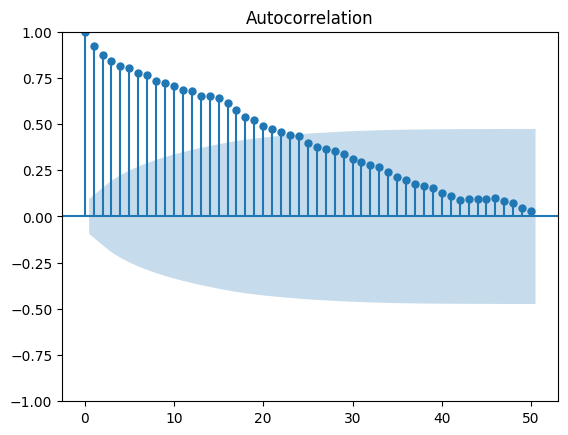

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the time series
df_bermaz['vehicle_count'].plot(title='Vehicle Count Over Time')

# ACF plot helps spot seasonality
plot_acf(df['vehicle_count'], lags=50)  # look for spikes at seasonal intervals (e.g., lag=12)


In [192]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

p = d = q = range(0, 3)
pdq = list(itertools.product(p, [1], q))  # fix d=1 for now

aic_scores = []

for order in pdq:
    try:
        model = SARIMAX(y, exog=X, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        aic_scores.append((order, results.aic))
    except:
        continue

# Sort by AIC
best_models = sorted(aic_scores, key=lambda x: x[1])
print("Top 3 models by AIC:")
for model in best_models[:3]:
    print(f"Order={model[0]}, AIC={model[1]:.2f}")


Top 3 models by AIC:
Order=(2, 1, 2), AIC=1158.05
Order=(0, 1, 2), AIC=1162.07
Order=(1, 1, 2), AIC=1163.68


## SARIMAX - DRB-HICOM

In [6]:
# Filter company and date
df_drbhicom = df[(df['company'] == 'DRB-HICOM Berhad') & (df['date'] < '2024-10-01')].copy()

# Set the date as index
df_drbhicom.set_index('date', inplace=True)

# Sort by date just in case
df_drbhicom.sort_index(inplace=True)

# Target variable (endogenous)
y = df_drbhicom['vehicle_count']

# Exogenous variables
exog_vars = [
    'cars_cpi' , 'u_rate'
]

# exog_vars = [
#     'cars_cpi', 'opr','lf_employed', 'p_rate',
#     'ep_ratio', 'u_rate'
# ]
X = df_drbhicom[exog_vars]


In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMAX model (simple config, can be optimized later)
model = SARIMAX(y, exog=X, order=(1, 1, 1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Summary
model_fit.summary()

c:\Users\gooyt\Desktop\automotive-bursa\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gooyt\Desktop\automotive-bursa\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       vehicle_count   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -435.157
Date:                             Mon, 02 Jun 2025   AIC                            884.313
Time:                                     20:35:43   BIC                            896.642
Sample:                                 01-01-2018   HQIC                           888.860
                                      - 09-01-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cars_cpi   -5577.0894   2968.687     -1.879      0.060   -1.14e+04     241.431
u_rate     -9183.8347   7722.301     -1.189      0.234   -2.43e+04    5951.597
ar.L1          0.9312      0.113      8.229      0.000       0.709       1.153
ma.L1         -0.9851      0.370     -2.664      0.008      -1.710      -0.260
ar.S.L12      -0.5141      0.217     -2.368      0.018      -0.940      -0.089
ar.S.L24      -0.3599      0.214     -1.679      0.093      -0.780       0.060
sigma2      4.153e+07      0.185   2.25e+08      0.000    4.15e+07    4.15e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.65   Prob(JB):                         0.11
Heteroskedasticity (H):               0.46   Skew:                             0.63
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.74e+25. Standard errors may be unstable.
"""

              Forecasted  Actual
2024-10-01  21310.177436   21884
2024-11-01  28894.862500   21357
2024-12-01  32857.494311   26658
2025-01-01  18248.293954   15939
2025-02-01  15424.736020   20639
2025-03-01  20574.689686   26087


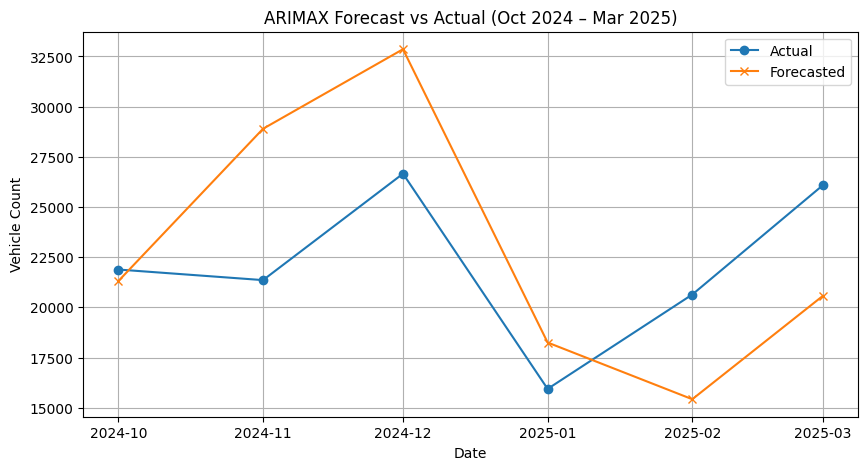

In [8]:
# Filter the next 6 months (for validation and exog forecast)
df_val = df[(df['company'] == 'DRB-HICOM Berhad') & 
            (df['date'] >= '2024-10-01') & 
            (df['date'] <= '2025-03-01')].copy()

# Make sure dates are sorted and indexed properly
df_val.set_index('date', inplace=True)
df_val.sort_index(inplace=True)

# Exogenous variables for prediction
X_future = df_val[exog_vars]

# Forecast 6 months using future exogenous variables
forecast_6mo = model_fit.forecast(steps=6, exog=X_future)

# Actual values from validation set
y_actual = df_val['vehicle_count']

# Combine into a DataFrame
results = pd.DataFrame({
    'Forecasted': forecast_6mo,
    'Actual': y_actual
})
print(results)

plt.figure(figsize=(10, 5))
plt.plot(results.index, results['Actual'], label='Actual', marker='o')
plt.plot(results.index, results['Forecasted'], label='Forecasted', marker='x')
plt.title('ARIMAX Forecast vs Actual (Oct 2024 – Mar 2025)')
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid(True)
plt.show()


## SARIMAX - TCMH

In [212]:
df['company'].unique()

array(['Bermaz Auto Berhad', 'DRB-HICOM Berhad', 'Sime Darby Berhad',
       'Sime UMW Holdings Berhad', 'Tan Chong Motor Holdings Berhad'],
      dtype=object)

c:\Users\gooyt\Desktop\automotive-bursa\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gooyt\Desktop\automotive-bursa\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gooyt\Desktop\automotive-bursa\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                       vehicle_count   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -317.945
Date:                             Mon, 02 Jun 2025   AIC                            649.890
Time:                                     20:35:26   BIC                            662.219
Sample:                                 01-01-2018   HQIC                           654.437
                                      - 09-01-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cars_cpi    -702.0777    211.144     -3.325      0.001   -1115.912    -288.243
u_rate      -895.2301    29

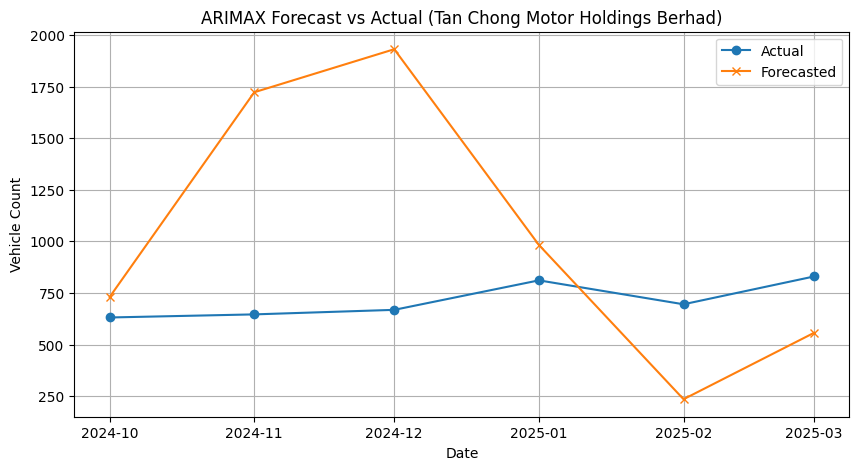

In [4]:
import sys
import os

# Add the parent directory to sys.path so you can import from utils
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils import forecast_vehicle_count_arimax

exog_list = ['cars_cpi','u_rate']

forecast_results = forecast_vehicle_count_arimax(
    df,
    company_name='Tan Chong Motor Holdings Berhad',
    exog_vars=exog_list,
    train_end_date='2024-10-01',
    forecast_end_date='2025-03-01'
)


## SARIMAX - Sime Darby

c:\Users\gooyt\Desktop\automotive-bursa\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gooyt\Desktop\automotive-bursa\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gooyt\Desktop\automotive-bursa\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                       vehicle_count   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -331.789
Date:                             Mon, 02 Jun 2025   AIC                            677.578
Time:                                     20:35:04   BIC                            689.907
Sample:                                 01-01-2018   HQIC                           682.124
                                      - 09-01-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cars_cpi    -905.8209    227.661     -3.979      0.000   -1352.028    -459.613
u_rate     -1078.7448    41

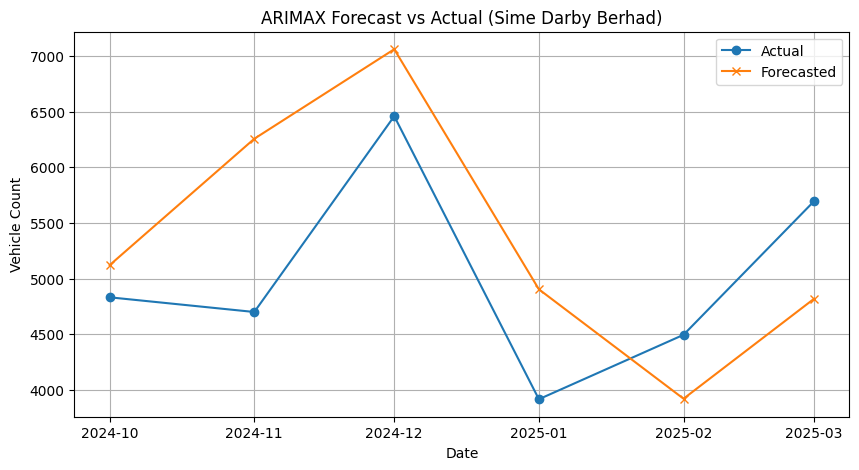

In [3]:
import sys
import os

# Add the parent directory to sys.path so you can import from utils
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils import forecast_vehicle_count_arimax

exog_list = ['cars_cpi','u_rate']

forecast_results = forecast_vehicle_count_arimax(
    df,
    company_name='Sime Darby Berhad',
    exog_vars=exog_list,
    train_end_date='2024-10-01',
    forecast_end_date='2025-03-01'
)
